## AI Exercise 1: Neural Network

QUESTION 

Using the datasets methods in sklearn (make_classification), create a
data set with 500,000 observations and 3 classes. Add some noise too.

1] Implement a neural network model with 4 hidden layers using Keras

2] Varying the number of neurons and activation functions

3] Plot the training and testing error, training and testing accuracy

4] Plot the confusion matrix and write a summary of your findings.


1] Generating the dataset of 500, 000 observations using Scikit-learn dataset library


In [44]:
# Importing the necessary libraries

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [45]:
# The dataset to carry out this exercise is generated using Scikit-learn dataset library.

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500000, n_features=22, 
                           n_informative=20, n_classes=3, random_state=42) 

"""Hence, the noise is 2"""


'Hence, the noise is 2'

In [46]:
# Then before performing the regression, the dataset undergoes pre-processing. In this exercise
# the dataset is standardized

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

In [47]:
#Then the dataset is split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

2.] Varying the number of neurons and activation functions

In [49]:
# Implementation of the neural network model with 4 hidden layers of 32 to 128 neutrons
#and tanh activation function using Keras. 

model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, batch_size=500)

Epoch 1/100
700/700 [==============================] - 9s 10ms/step - loss: 0.2224 - accuracy: 0.9241 - val_loss: 0.0950 - val_accuracy: 0.9774
Epoch 2/100
700/700 [==============================] - 7s 10ms/step - loss: 0.0842 - accuracy: 0.9817 - val_loss: 0.0758 - val_accuracy: 0.9845
Epoch 3/100
700/700 [==============================] - 7s 10ms/step - loss: 0.0720 - accuracy: 0.9856 - val_loss: 0.0697 - val_accuracy: 0.9860
Epoch 4/100
700/700 [==============================] - 7s 10ms/step - loss: 0.0652 - accuracy: 0.9875 - val_loss: 0.0643 - val_accuracy: 0.9875
Epoch 5/100
700/700 [==============================] - 7s 10ms/step - loss: 0.0604 - accuracy: 0.9888 - val_loss: 0.0598 - val_accuracy: 0.9887
Epoch 6/100
700/700 [==============================] - 8s 11ms/step - loss: 0.0572 - accuracy: 0.9896 - val_loss: 0.0585 - val_accuracy: 0.9892
Epoch 7/100
700/700 [==============================] - 7s 10ms/step - loss: 0.0545 - accuracy: 0.9903 - val_loss: 0.0558 - val_accuracy:

3] Plot the residual training and testing error.

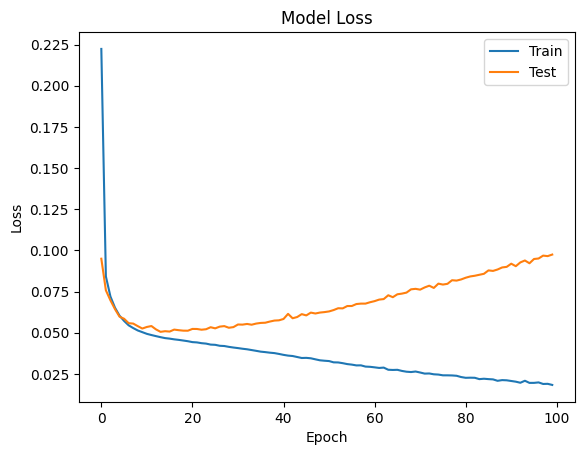

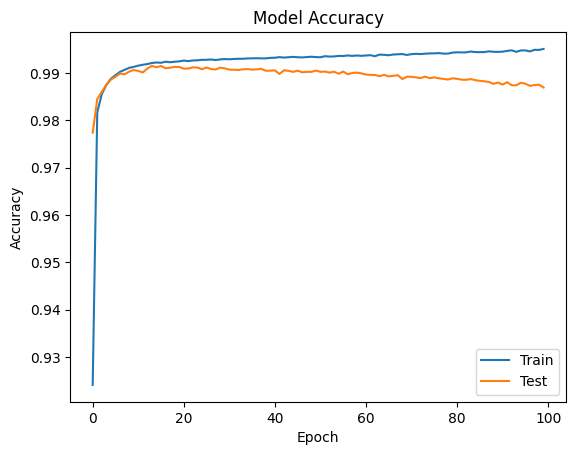

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

4] Plot the confusion matrix and write a summary of your findings.

4688/4688 [==============================] - 11s 2ms/step


Text(50.722222222222214, 0.5, 'True labels')

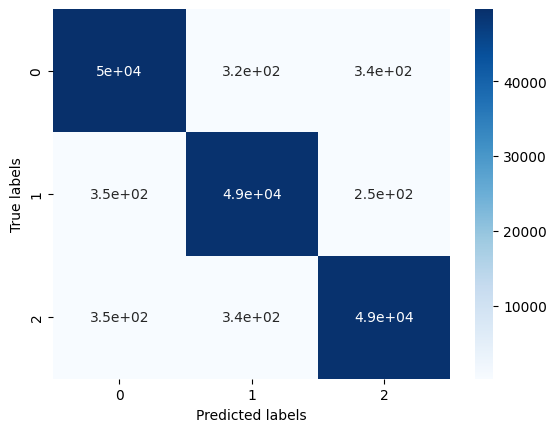

In [51]:
# Computing and plotting the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

**Report on my findings**

- As required for this exercise, the number of hidden layers, neutrons and activation function is changed. The number of hidden layer is changed to 4 with 128, 64, 64 and 32 neutrons. And the activation function is changed to tanh.

- The model produced a val-accuracy of 0.987 which is close to 1. This is an indication that my model, with the changed hidden layer, neutrons and activation function, is neither underfitted nor overfitting for the dataset.

I also plotted the residual training and testing but there is a little change in this plot as compared to the former one. The graphs of the training and testing in model loss and accuracy approaching to 0 and 1 respectively, indicates that my neural network model can be considered fitting for the dataset `(oversitting or underfitting).`

However, on closer observation, the exponetial testing line (orange) in the model loss is observed to have ascended to 0.1 after reaching its minimum point at 10 epoch. This accounts for slight model loss. This also applies to the exponetial testing line (orange) in the accuracy model observed to descend to 0.985 after it reached its maximum point at roughly 7 epoch. This accounted for slight error in the model accuracy.
The confusion matrix is also plotted to evaluate the performance of the model. From the matrix, it is observed that there is no type I or type II error.
